In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
print(df.isnull().sum()) 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
print(df.isnull().sum()) 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


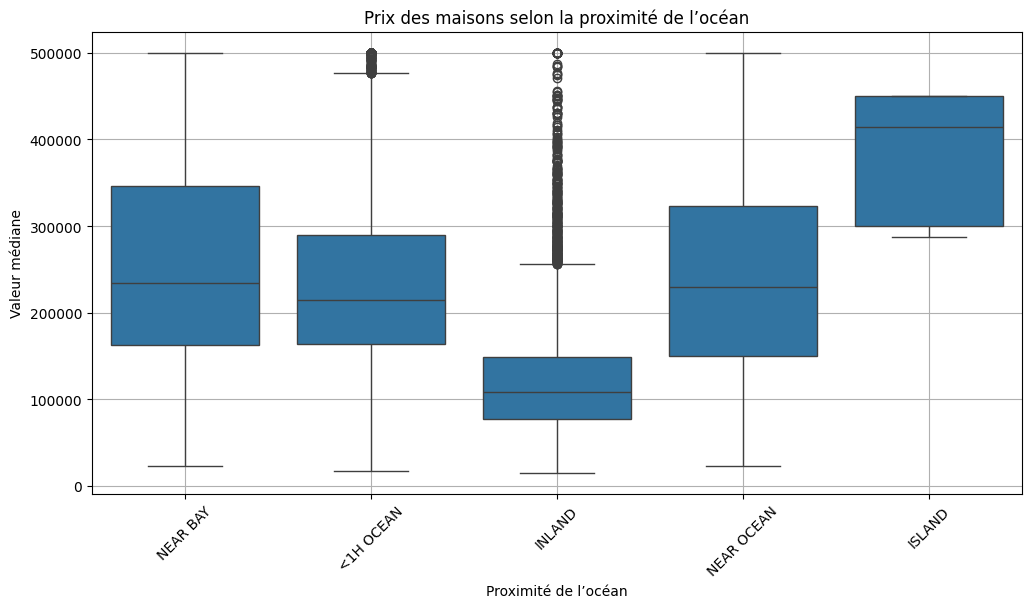

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title("Prix des maisons selon la proximité de l’océan")
plt.xlabel("Proximité de l’océan")
plt.ylabel("Valeur médiane")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
df = pd.get_dummies(df,columns=['ocean_proximity'], drop_first=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


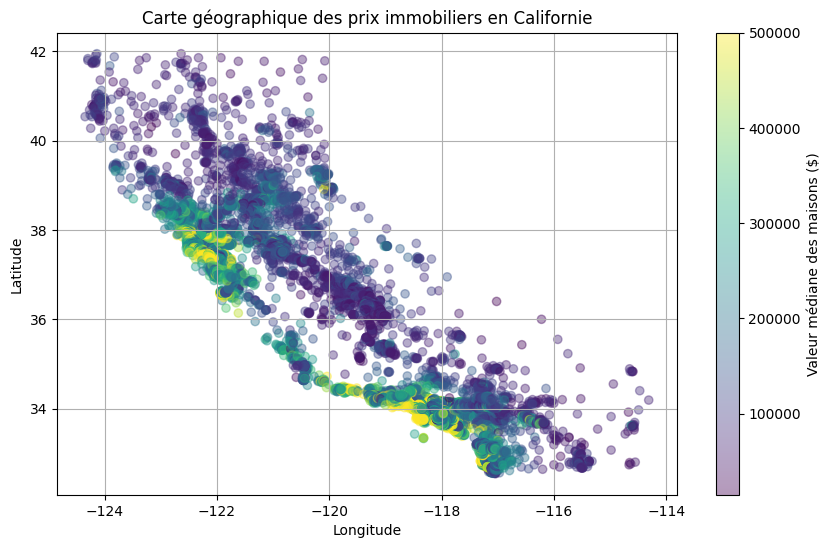

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.4)
plt.colorbar(label='Valeur médiane des maisons ($)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte géographique des prix immobiliers en Californie")
plt.grid(True)
plt.show()


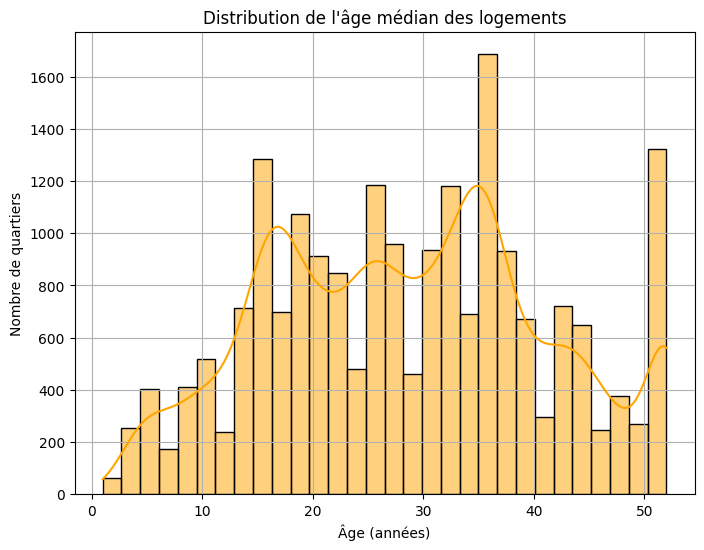

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['housing_median_age'], bins=30, kde=True, color='orange')
plt.title("Distribution de l'âge médian des logements")
plt.xlabel("Âge (années)")
plt.ylabel("Nombre de quartiers")
plt.grid(True)
plt.show()


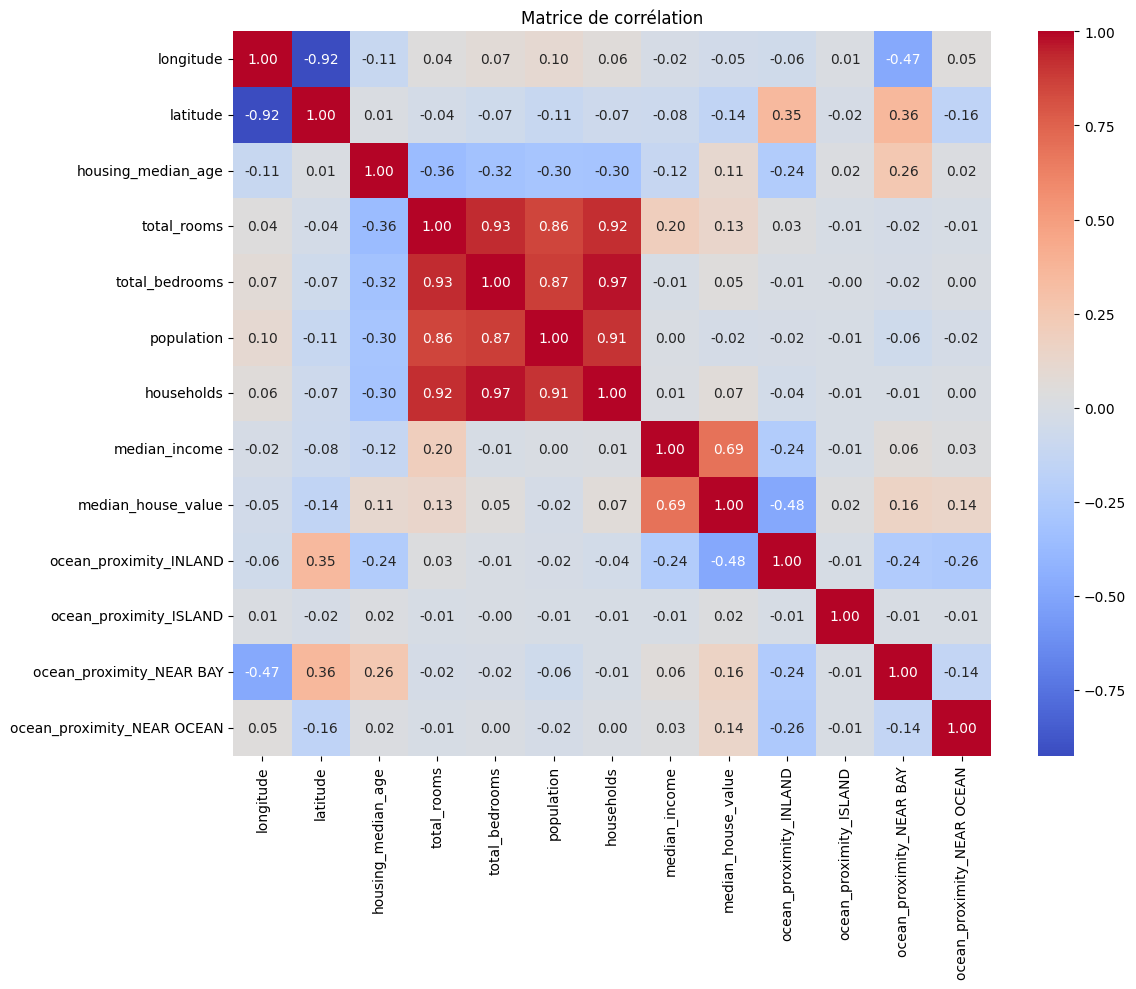

In [47]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


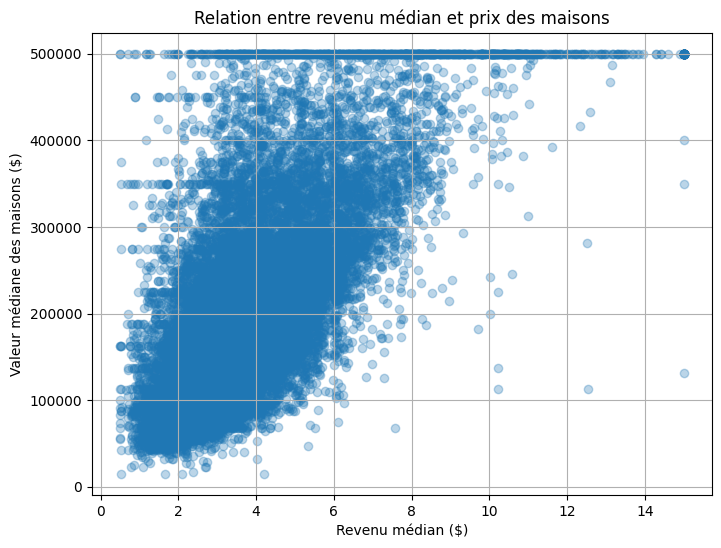

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.xlabel("Revenu médian ($)")
plt.ylabel("Valeur médiane des maisons ($)")
plt.title("Relation entre revenu médian et prix des maisons")
plt.grid(True)
plt.show()


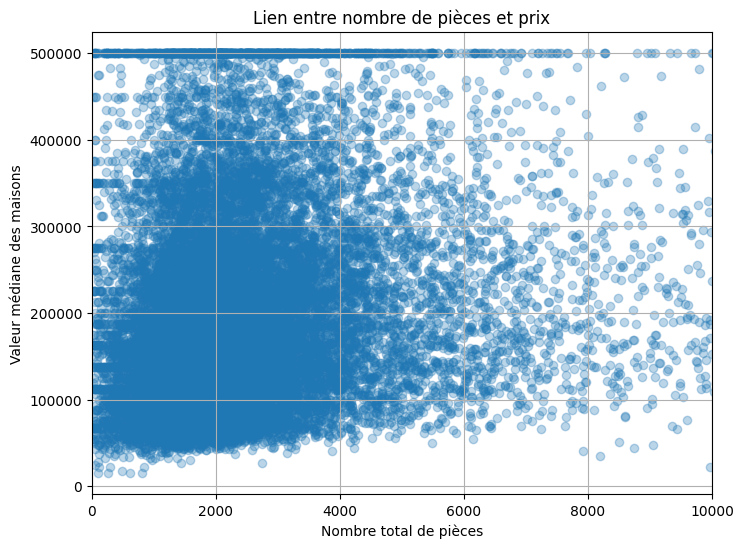

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.3)
plt.xlabel("Nombre total de pièces")
plt.ylabel("Valeur médiane des maisons")
plt.title("Lien entre nombre de pièces et prix")
plt.xlim(0, 10000)   
plt.grid(True)
plt.show()


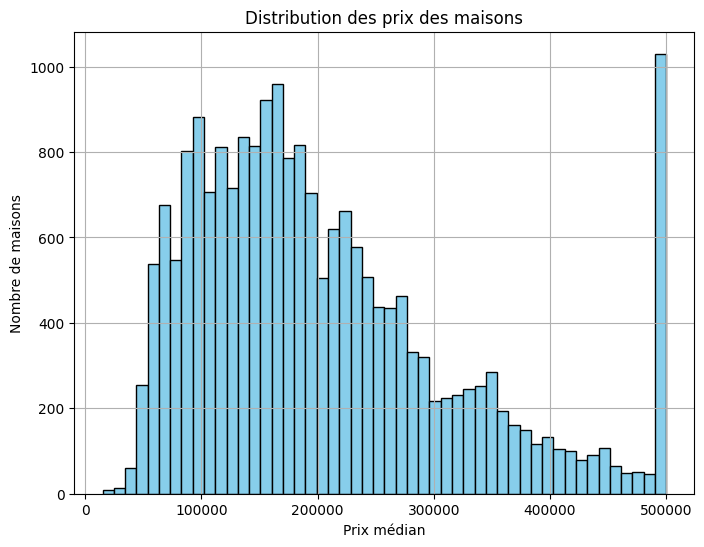

In [17]:
plt.figure(figsize=(8,6))
plt.hist(df['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des prix des maisons")
plt.xlabel("Prix médian")
plt.ylabel("Nombre de maisons")
plt.grid(True)
plt.show()


In [11]:
# 📊 Variables explicatives (toutes sauf le prix)
X = df.drop('median_house_value', axis=1)
# 🎯 Variable cible = prix de la maison
y = df['median_house_value']

In [12]:
# 80% pour entraînement, 20% pour test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Créer le modèle
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
# Entraîner le modèle
model.fit(X_train, y_train)
# Prédire
y_pred = model.predict(X_test)
# Évaluer
print("MAE:", mean_absolute_error(y_test, y_pred)) 
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 32754.13151325551
RMSE: 48844.91531212096
R²: 0.8179327376823216


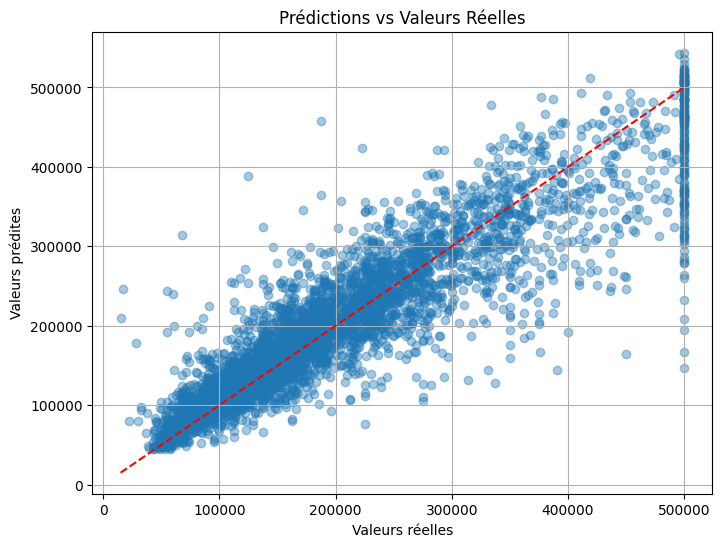

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale parfaite
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Valeurs Réelles")
plt.grid(True)
plt.show()


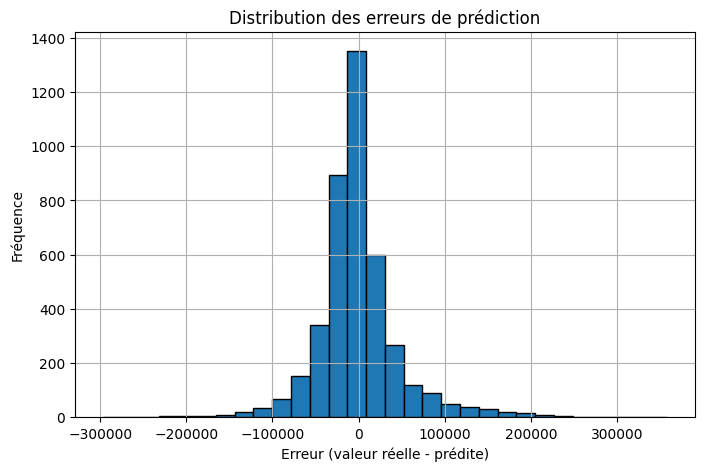

In [123]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution des erreurs de prédiction")
plt.xlabel("Erreur (valeur réelle - prédite)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


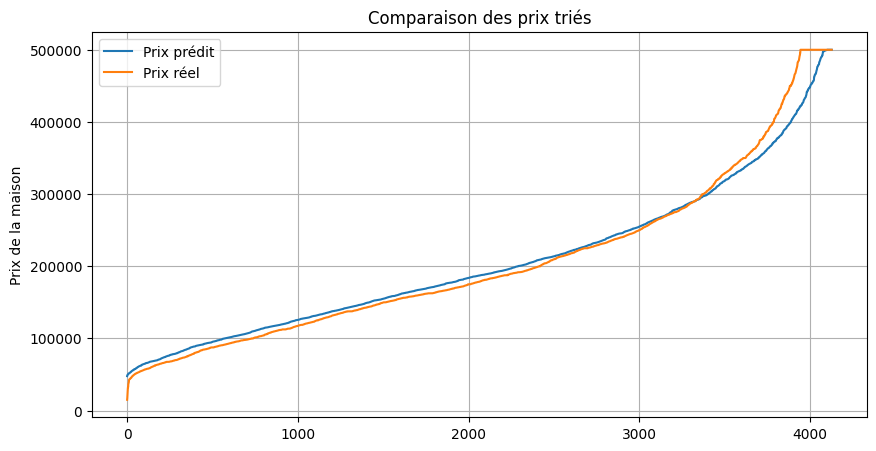

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(sorted(y_pred), label='Prix prédit')
plt.plot(sorted(y_test.values), label='Prix réel')
plt.title("Comparaison des prix triés")
plt.ylabel("Prix de la maison")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
exemple = X_test.iloc[2]
valeur_reelle = y_test.iloc[2]
prediction = model.predict([exemple])[0]
print(exemple)
print("🟡 Prix réel :", valeur_reelle)
print("🔵 Prix prédit :", prediction)


longitude                        -122.44
latitude                            37.8
housing_median_age                  52.0
total_rooms                       3830.0
total_bedrooms                537.870553
population                        1310.0
households                         963.0
median_income                     3.4801
ocean_proximity_INLAND             False
ocean_proximity_ISLAND             False
ocean_proximity_NEAR BAY            True
ocean_proximity_NEAR OCEAN         False
Name: 15663, dtype: object
🟡 Prix réel : 500001.0
🔵 Prix prédit : 459091.2


In [13]:
def to_classe_prix(val):
    if val < 119600:
        return "Très bas"
    elif val < 179700:
        return "Bas"
    elif val < 264725:
        return "Moyen"
    else:
        return "Haut"

In [ ]:
y_test_class = [to_classe_prix(val) for val in y_test]
y_pred_class = [to_classe_prix(val) for val in y_pred]

4128

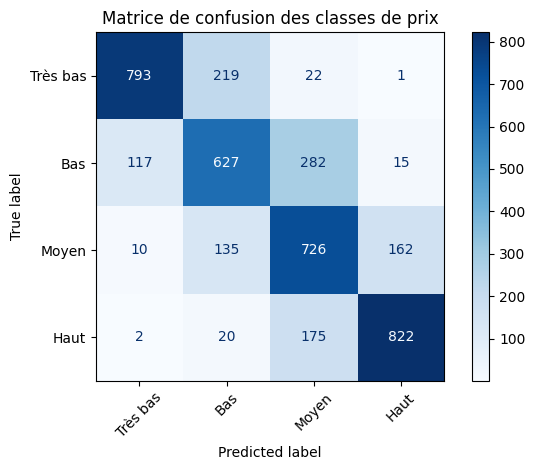

In [16]:
labels = ['Très bas', 'Bas', 'Moyen', 'Haut']
cm = confusion_matrix(y_test_class, y_pred_class, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de confusion des classes de prix")
plt.tight_layout()
plt.show()


In [19]:
#Accuracy globale
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"✅ Accuracy globale : {accuracy:.4f} ({accuracy*100:.2f}%)")

✅ Accuracy globale : 0.7190 (71.90%)


In [17]:
joblib.dump(model, 'model.pkl')

['model.pkl']